<a href="https://colab.research.google.com/github/Sukruthr/Book-Recommendation-System/blob/main/Book_Recommendation_System_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

In [71]:
# import required libraries
import re
# import pickle
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# from collections import Counter
from scipy.sparse import csr_matrix
from pandas.api.types import is_numeric_dtype
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

## File path's

### Amit

In [72]:
# # books file path
# books = pd.read_csv('')

# # users file path
# users = pd.read_csv('')

# # ratings file path
# ratings = pd.read_csv('')

### Anand

In [73]:
# # books file path
# books = pd.read_csv('')

# # users file path
# users = pd.read_csv('')

# # ratings file path
# ratings = pd.read_csv('')

### Kanishque

In [74]:
# # books file path
# books = pd.read_csv('')

# # users file path
# users = pd.read_csv('')

# # ratings file path
# ratings = pd.read_csv('')

### Sukruth

In [75]:
# books file path
books = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Book Recommendation System ( Unsupervised ML )/Resources/Books.csv')

# users file path
users = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Book Recommendation System ( Unsupervised ML )/Resources/Users.csv')

# ratings file path
ratings = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Team Capstone Projects/Book Recommendation System ( Unsupervised ML )/Resources/Ratings.csv')

## DATA Preprocessing

### Books data cleaning

In [76]:
# look at the books data
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [77]:
# info
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [78]:
# columns and data shape
print(f"Books dataset shape : {books.shape}")
print(f"Books columns: {list(books.columns)} " )

Books dataset shape : (271360, 8)
Books columns: ['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L'] 


In [79]:
# Drop URL columns that arent required for analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis=1, inplace=True)
print(f'Books table after dropping the 3 Image-cols')
books.head()

Books table after dropping the 3 Image-cols


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [80]:
# Checking for null values
col_with_nulls = books.isnull().sum()
col_with_nulls

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
dtype: int64

There are intotal 3 null values let us look at them and handle them

In [81]:
# return indices of null values
b_null_items = [] 
for col in books.columns:
  b_null_items += books[books[col].isnull()].index.tolist()
print(f'The indices of null values are : {b_null_items}')

The indices of null values are : [187689, 128890, 129037]


In [82]:
# items with missing data 
books.iloc[b_null_items]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [83]:
# fill the missing values with Other
books.iloc[b_null_items] = books.iloc[b_null_items].fillna('Other')

In [84]:
# Checking for column Year-of-publication
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [85]:
# at Year-Of-Publication = DK Publishing Inc
books.loc[books['Year-Of-Publication'] == 'DK Publishing Inc',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [86]:
# at Year-Of-Publication = Gallimard
books.loc[books['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


we have two different name values instead of year at ('DK Publishing Inc' & 'Gallimard')

In [87]:
# well it's not just the years but also author and publisher names have been interchanged
# let's correct this by inserting the right values into them

# change values of book(209538)
books.at[209538 ,'Publisher'] = 'DK Publishing Inc'
books.at[209538 ,'Year-Of-Publication'] = 2000
books.at[209538 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[209538 ,'Book-Author'] = 'Michael Teitelbaum'

# change values of book(221678)
books.at[221678 ,'Publisher'] = 'DK Publishing Inc'
books.at[221678 ,'Year-Of-Publication'] = 2000
books.at[221678 ,'Book-Title'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'
books.at[221678 ,'Book-Author'] = 'James Buckley'

# change values of book(220731)
books.at[220731 ,'Publisher'] = 'Gallimard'
books.at[220731 ,'Year-Of-Publication'] = 2003
books.at[220731 ,'Book-Title'] = 'Peuple du ciel - Suivi de Les bergers '
books.at[220731 ,'Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'

In [88]:
# confirming the change
for index in [209538,221678,220731]:
  print(books.iloc[index])
  print('-'*30)

ISBN                                                          078946697X
Book-Title             DK Readers: Creating the X-Men, How It All Beg...
Book-Author                                           Michael Teitelbaum
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Name: 209538, dtype: object
------------------------------
ISBN                                                          0789466953
Book-Title             DK Readers: Creating the X-Men, How Comic Book...
Book-Author                                                James Buckley
Year-Of-Publication                                                 2000
Publisher                                              DK Publishing Inc
Name: 221678, dtype: object
------------------------------
ISBN                                               2070426769
Book-Title             Peuple du ciel - Suivi de Les bergers 
Book-Author                 

In [89]:
# convert type to int
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype('int64')

Now that we have taken care of one issue of replacing the charecters with theier respective year, we still have to deal with books that were published in the future ....

In [90]:
# before cleaning - sorted dates
sorted_book_dates = sorted(list(books['Year-Of-Publication'].unique()))
print(sorted_book_dates)

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


From the sorted list we can see that our fataset consists of books being published during " The Big Bang " (year-of-publication = 0)
and few from the future (year-of-publication > 2004),

Sadly as this dataset was published in 2004(so no books from the future...)

In [91]:
sorted_book_dates[:3]

[0, 1376, 1378]

In [92]:
# book published during year 0 
books.loc[books['Year-Of-Publication']==sorted_book_dates[0]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


Well that just looks like a typo/error during data entry

In [93]:
# book published in 1376
books.loc[books['Year-Of-Publication']==sorted_book_dates[1]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz


[IsmaÂ°il Fasih's book - Tasht-i khun was published in the year - 1997](https://ferdosi.com/pages/product/?lang=en&product=0&id=964442011X&title=Tasht-i+khun&ntitle=%D8%B7%D8%B4%D8%AA+%D8%AE%D9%88%D9%86)

In [94]:
books.loc[books['Year-Of-Publication']==sorted_book_dates[2]]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus


[Nazi Safavi book - Dalan-i bihisht (Dastan-i Irani) was published in the year 1999](https://www.goodreads.com/author/show/5494214.Nazi_Safavi)

In [95]:
# correcting years of books in dataset

# book - Tasht-i khun
books.loc[books['Year-Of-Publication']==sorted_book_dates[1], 'Year-Of-Publication'] = 1997
# book - Dalan-i bihisht (Dastan-i Irani)
books.loc[books['Year-Of-Publication']==sorted_book_dates[2], 'Year-Of-Publication'] = 1999

# replace the null and outliers with the mode(year-of-publication)
books.loc[(books['Year-Of-Publication'] > 2004) , 'Year-Of-Publication'] = 2002
books.loc[(books['Year-Of-Publication'] == 0), 'Year-Of-Publication'] = 2002

In [96]:
# after cleaning - sorted dates
print(sorted(list(books['Year-Of-Publication'].unique())))

[1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004]


after observing the unique years we can confirm that our corrections have taken effect

Text(0.5, 1.0, 'Number of Books published each year ')

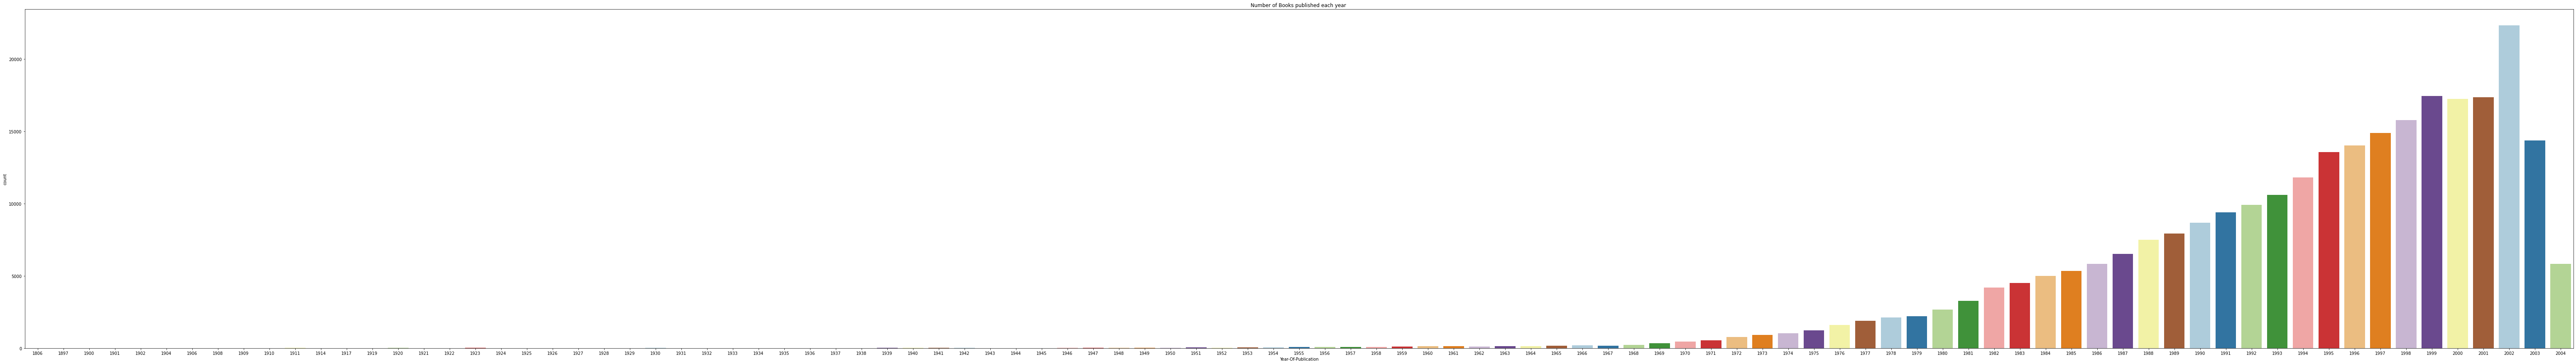

In [97]:
  # plot the number of books published year-on-year
  plt.figure(figsize=(110,15))
  sns.countplot(x='Year-Of-Publication',data=books,palette='Paired')
  plt.title('Number of Books published each year ')

In [98]:
# Upper casing all alphabets in ISBN
books['ISBN'] = books['ISBN'].str.upper()

In [99]:
# Drop duplicate rows
books.drop_duplicates(keep='last', inplace=True) 
books.reset_index(drop = True, inplace = True)

# size of df after dropping
print(f'Shape of dataframe after dropping duplicates : {books.shape}')
print(f'Number of duplicates dropped are : {271360 - books.shape[0]}')

Shape of dataframe after dropping duplicates : (271047, 5)
Number of duplicates dropped are : 313


In [100]:
# checking ISBN for special charecters
def specialCharDetector(d_frame,col_v):
  flag = 0
  reg = "[^A-Za-z0-9]"

  # loop through each item(isbn) in the given col
  for x in d_frame[col_v]:
      z = re.search(reg,x)    
      if z:
          flag = 1
  # if flag is set to 1 then there are special charecters
  if flag == 1:
      print(f" Special charecters found in {col_v}")
  else:
      print(f" No special charecters found in {col_v}")

In [101]:
specialCharDetector(books,'ISBN')

 Special charecters found in ISBN


[but isbn mustn't contain special charecters ](http://www-math.ucdenver.edu/~wcherowi/jcorner/isbn.html)

In [102]:
# removing extra characters from ISBN (from ratings dataset) existing in books dataset
def removeSpecialChar(df_):
  bookISBN = df_['ISBN'].tolist() 
  reg = "[^A-Za-z0-9]" 
  for index, row_Value in df_.iterrows():
      z = re.search(reg, row_Value['ISBN'])    
      if z:
          f = re.sub(reg,"",row_Value['ISBN'])
          if f in bookISBN:
              df_.at[index , 'ISBN'] = f

In [103]:
# remove special charecters
removeSpecialChar(books)

In [104]:
# count plot values on required axis based off  on the dataframe
def CountPlotN(col,data,n,title,axis_flag=0):
  
  ''' count plot values on required axis
  axis_flag - specify axis-(0)=y_axis ; (1)=x_axis, 
  data - dataframe,
  n - select the topN values to be displaced
  title - specify the title to be displayed '''

  plt.figure(figsize=(15,7))
  order = pd.value_counts(data[col]).iloc[:n].index
  # change axis based on flag
  if axis_flag:
    sns.countplot(x=col,data=data,order=order,palette='Paired')
  else:
    sns.countplot(y=col,data=data,order=order,palette='Paired')
  plt.title(title)

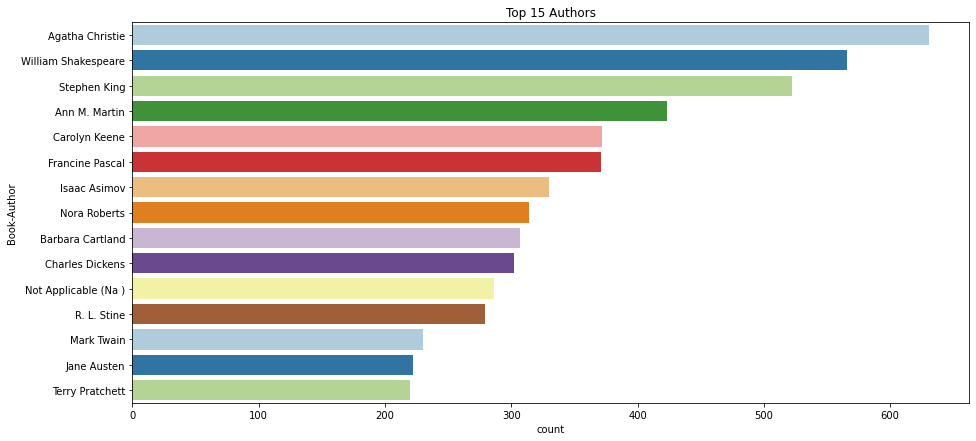

In [105]:
# plot the author whose books were read the most
CountPlotN('Book-Author',books,15,'Top 15 Authors')

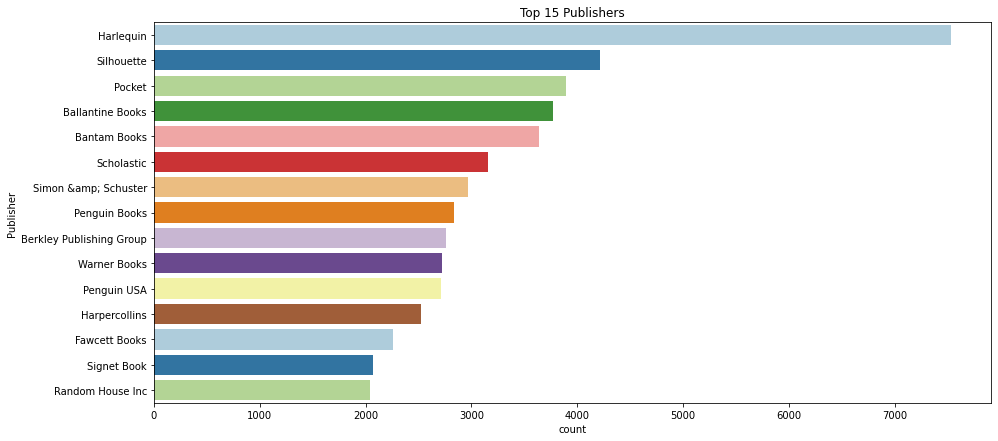

In [106]:
# publishers whoose books were read by the most readers
CountPlotN('Publisher',books,15,'Top 15 Publishers')

### Users data cleaning

In [107]:
# look at the users
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [108]:
# info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [109]:
print(f" Users dataset shape: {users.shape}")
print(f" Columns of users dataset : {list(users.columns)}")

 Users dataset shape: (278858, 3)
 Columns of users dataset : ['User-ID', 'Location', 'Age']


In [110]:
# Checking null values
print(users.isna().sum())   

User-ID          0
Location         0
Age         110762
dtype: int64


In [111]:
# Check for all unique values present in Age column
print(sorted(list(users['Age'].unique())))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

Text(0.5, 1.0, 'Distribution Plot of users age ')

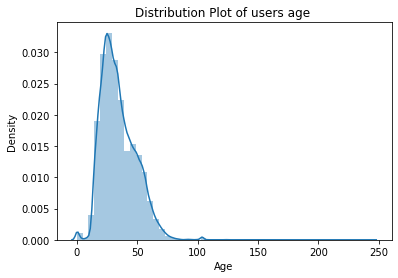

In [112]:
# Dist Plot of users age
sns.distplot(users.Age)
plt.title('Distribution Plot of users age ')

In [113]:
# CountPlotN('Age',users,len(users),'bal',1)

In [114]:
# claclulate the mean users age 
mean_user_age = round( users[(users['Age'] <= 90) & (users['Age'] >= 10)]['Age'].mean())
mean_user_age

35

In [115]:
# outliers with age grater than 80 & age less than 10 years are substitued with mean users age
users.loc[(users['Age'] > 80) | (users['Age'] < 10 ), 'Age'] = mean_user_age
# filling null values with mean
users['Age'] = users['Age'].fillna(mean_user_age)     
# finally changing Datatype to int
users['Age'] = users['Age'].astype(int)       

In [116]:
# double check to see if missing values are present
users['Age'].isna().sum()

0

Text(0.5, 1.0, 'Distribution Plot of users age after mean replacement')

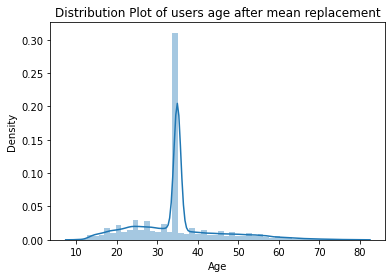

In [117]:
# Dist Plot of users age after fillings missing values and treating outliers
sns.distplot(users.Age)
plt.title('Distribution Plot of users age after mean replacement')

In [118]:
# CountPlotN('Age',users,len(users),'bal',1)

Well we have successfully handled the removal of all the existing null values in the age column

In [119]:
# in the dataset allthe city-state-country are gropued together 
# the code below will help split these into their respective categorys and add them into the df as cols

# split users location
list_ = users.Location.str.split(', ')

# lists of city,state & country
city = []
state = []
country = []
count_no_state = 0    
count_no_country = 0

# remove invalid entries too
for i in range(0,len(list_)):
    if list_[i][0] == ' ' or list_[i][0] == '' or list_[i][0]=='n/a' or list_[i][0] == ',':  
        city.append('other')
    else:
        city.append(list_[i][0].lower())

    if(len(list_[i])<2):
        state.append('other')
        country.append('other')
        count_no_state += 1
        count_no_country += 1
    else:
        if list_[i][1] == ' ' or list_[i][1] == '' or list_[i][1]=='n/a' or list_[i][1] == ',': 
            state.append('other')
            count_no_state += 1            
        else:
            state.append(list_[i][1].lower())
        
        if(len(list_[i])<3):
            country.append('other')
            count_no_country += 1
        else:
            if list_[i][2] == ''or list_[i][1] == ',' or list_[i][2] == ' ' or list_[i][2] == 'n/a':
                country.append('other')
                count_no_country += 1
            else:
                country.append(list_[i][2].lower())

# drop the locations col
users = users.drop('Location',axis=1)

temp = []
for ent in city:
    # handling cases where city/state entries from city list as state is already given 
    c = ent.split('/')            
    temp.append(c[0])

# create respective dataframes
df_city = pd.DataFrame(temp,columns=['City'])
df_state = pd.DataFrame(state,columns=['State'])
df_country = pd.DataFrame(country,columns=['Country'])

# add these newly created df to users df
users = pd.concat([users, df_city], axis=1)
users = pd.concat([users, df_state], axis=1)
users = pd.concat([users, df_country], axis=1)

# printing the number of countries didnt have any values 
print(count_no_country) 
# printing the states which didnt have any   
print(count_no_state)     

4659
16044


In [120]:
# Drop duplicate rows
users.drop_duplicates(keep='last', inplace=True)
users.reset_index(drop=True, inplace=True)

# size of df after dropping
print(f'Shape of dataframe after dropping duplicates : {users.shape}')
print(f'Number of duplicates dropped are : {278858 - users.shape[0]}')

Shape of dataframe after dropping duplicates : (278858, 5)
Number of duplicates dropped are : 0


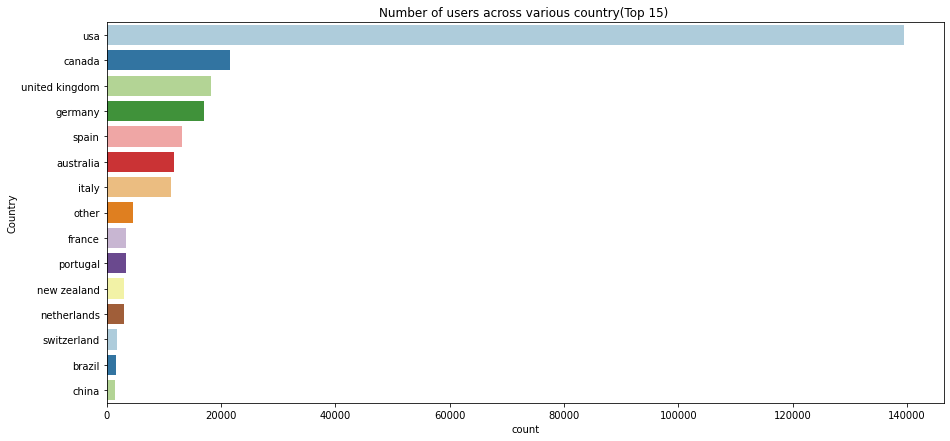

In [121]:
# readers across various countries
CountPlotN('Country',users,15,'Number of users across various country(Top 15) ')

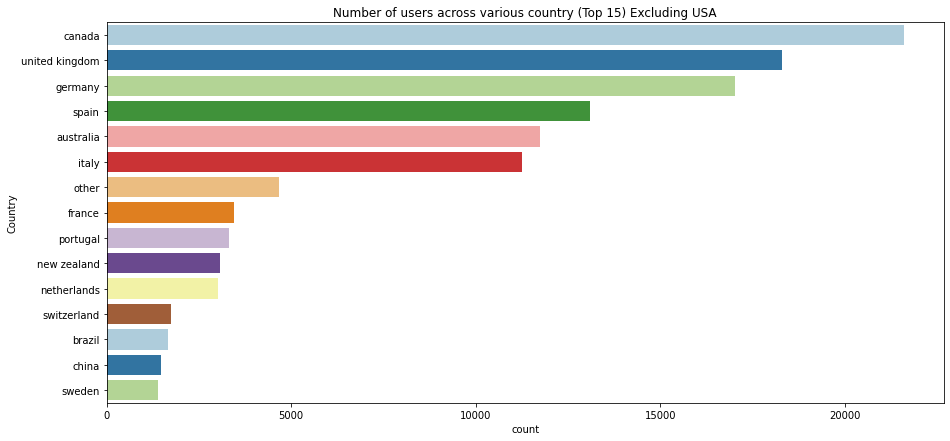

In [122]:
# excluding USA
CountPlotN('Country',users[users['Country']!='usa'],15,'Number of users across various country (Top 15) Excluding USA')

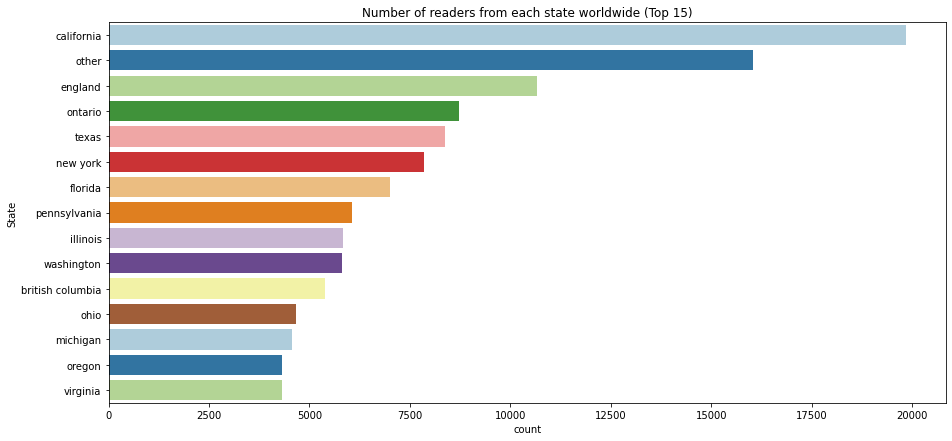

In [123]:
# states with most readers globally
CountPlotN('State',users,15,'Number of readers from each state worldwide (Top 15)')

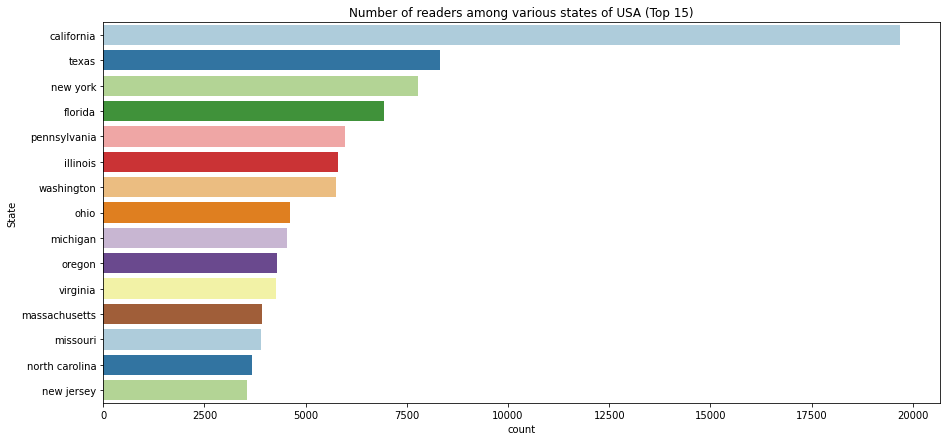

In [124]:
# states with most readers statewise in usa
CountPlotN('State',users[users['Country']=='usa'],15,'Number of readers among various states of USA (Top 15)')

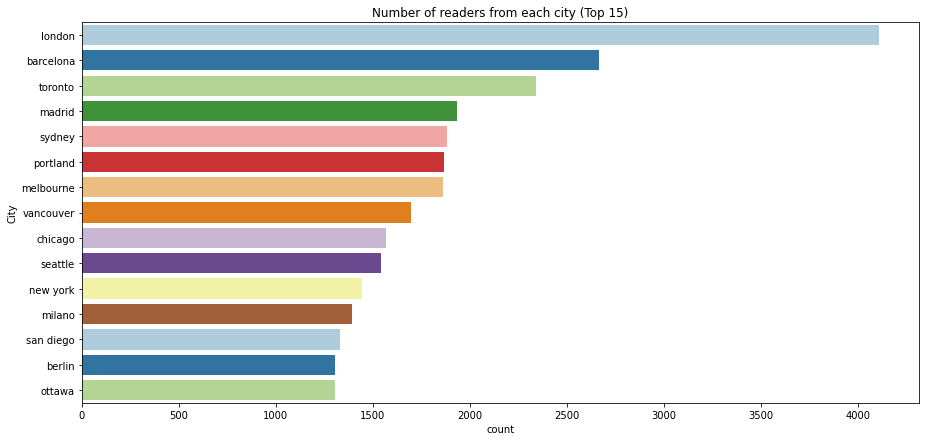

In [125]:
# cities with most readers
CountPlotN('City',users,15,'Number of readers from each city (Top 15)')

### Ratings data cleaning

In [126]:
# look at the ratings data
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [127]:
# info
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [128]:
print(f"Book-ratings Data : {ratings.shape}" )
print(f"Columns: {list(ratings.columns)}" )

Book-ratings Data : (1149780, 3)
Columns: ['User-ID', 'ISBN', 'Book-Rating']


In [129]:
# Checking for null values
ratings.isnull().sum() 

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [130]:
# checking User-ID & ratings contains only number or not
print(is_numeric_dtype(ratings['Book-Rating']))
print(is_numeric_dtype(ratings['User-ID']))

True
True


In [131]:
# checking ISBN
specialCharDetector(ratings,'ISBN')

 Special charecters found in ISBN


In [132]:
# remove special chars from isbn
removeSpecialChar(ratings)

In [133]:
# Uppercasing all alphabets in ISBN
ratings['ISBN'] = ratings['ISBN'].str.upper()

In [134]:
# Drop duplicate rows
ratings.drop_duplicates(keep='last', inplace=True)
ratings.reset_index(drop=True, inplace=True)

# size of df after dropping
print(f'Shape of dataframe after dropping duplicates : {ratings.shape}')
print(f'Number of duplicates dropped are : {1149780 - ratings.shape[0]}')

Shape of dataframe after dropping duplicates : (1149774, 3)
Number of duplicates dropped are : 6


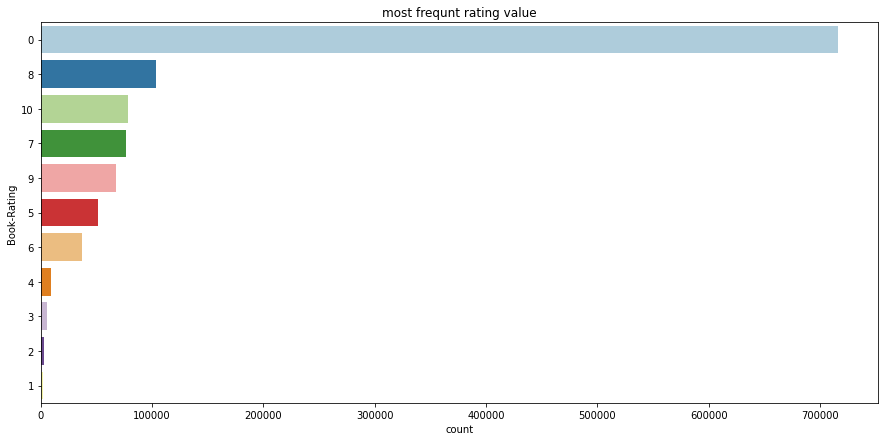

In [135]:
# frequntly used rating value
CountPlotN('Book-Rating',ratings,15,'most frequnt rating value')

the value for '0' seems to be dominant

In [136]:
#Hence segragating implicit-0 and explict(~ 0) ratings datasets
non_zero_ratings = ratings[ratings['Book-Rating'] != 0]
zero_rating = ratings[ratings['Book-Rating'] == 0]

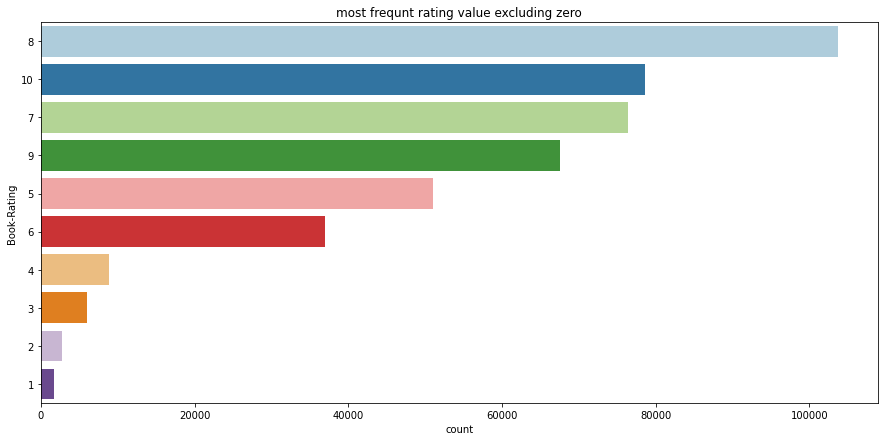

In [137]:
# frequntly used rating value
CountPlotN('Book-Rating',non_zero_ratings,15,'most frequnt rating value excluding zero')